In [86]:
import pandas as pd
from mplsoccer import Pitch, FontManager
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

In [87]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\Data\valladolidA.csv")

In [88]:
df[df['type'] == 'Goal']

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
370,2248235479,256,20,44.0,Barcelona,92.4,50.2,1,Goal,Successful,15.0,NaN,NaN
601,2248241471,408,34,40.0,Barcelona,96.4,47.9,1,Goal,Successful,9.0,NaN,NaN
1166,2248252093,744,64,35.0,Barcelona,90.8,61.5,2,Goal,Successful,10.0,NaN,NaN


In [89]:
# Filter for just Barcelona passes
df = df[df['teamId']=='Barcelona']

In [90]:
df['passer'] = df['playerId']
# shift player id up one 
df['recipient'] = df['playerId'].shift(-1)

passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

In [91]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [92]:
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

In [93]:
firstSub

70

In [94]:
successful = successful[successful['minute'] < firstSub]

In [95]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [96]:
# change shirt numbers to integer
passer = pd.to_numeric(successful['passer'],downcast='integer')
recipient = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = passer
successful['recipient'] = recipient

C:\Users\dmsta\AppData\Local\Temp\ipykernel_16904\531554506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = passer
C:\Users\dmsta\AppData\Local\Temp\ipykernel_16904\531554506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = recipient


In [97]:
average_locations = successful.groupby('passer').agg({'x':['mean'], 'y': ['mean','count']})
average_locations.columns = ['x','y','count']

In [98]:
average_locations

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [99]:
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()

In [100]:
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)

In [101]:
pass_between = pass_between[pass_between['pass_count']>3]

In [102]:
# join on passer
pass_between = pass_between.merge(average_locations, left_on = 'passer', right_index = True)
pass_between = pass_between.merge(average_locations, left_on = 'recipient', right_index = True, suffixes=['','_end'])

In [103]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locations['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)

In [104]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

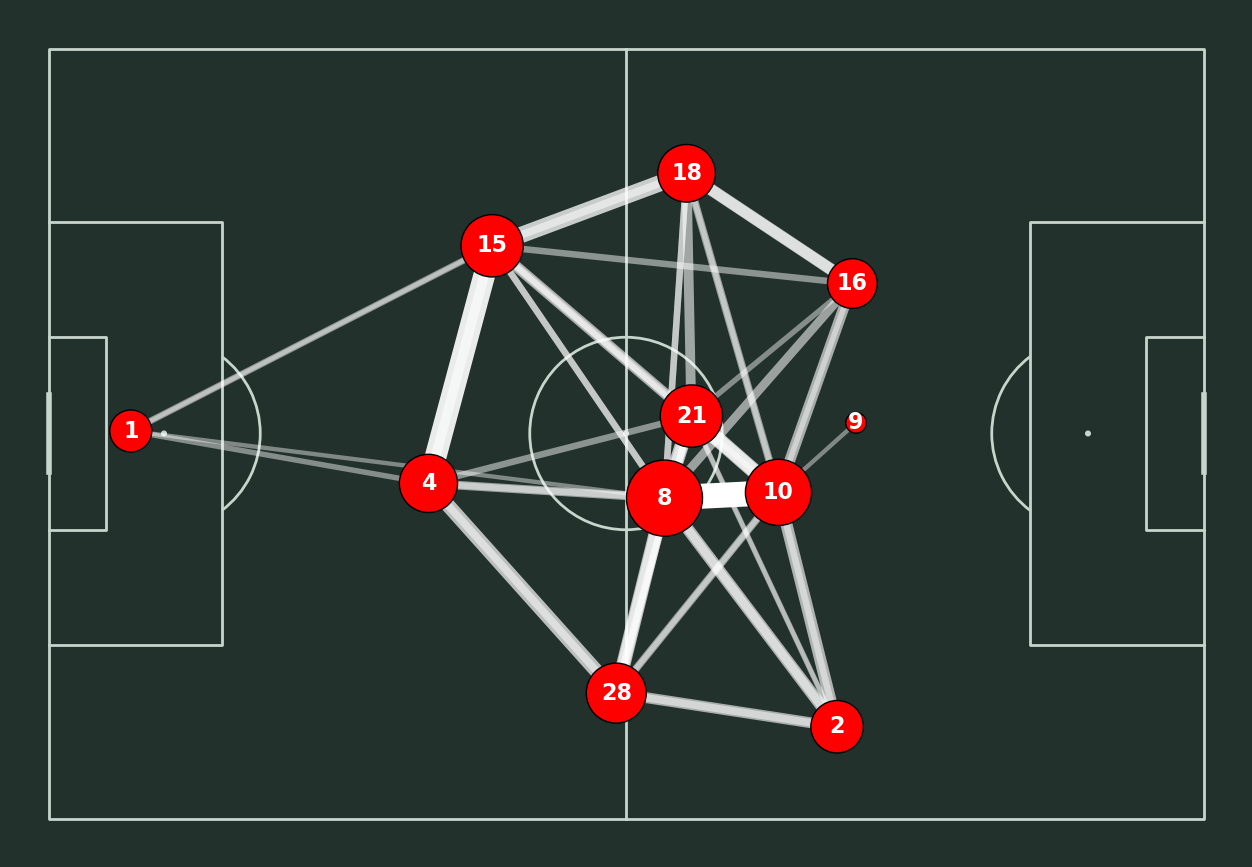

In [108]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
plt.gca().invert_yaxis()
lines = pitch.lines(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end, ax=ax,
                      lw = pass_between.width, color = color, zorder = 1)

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                      s = average_locations.marker_size, color = 'red', 
                      edgecolors = 'black', linewidth = 1,zorder = 1, ax=ax)
for index, row in average_locations.iterrows():
    pitch.annotate(row.name,xy=(1.2*row.x,.8*row.y),va='center',
                   ha='center', size=16, weight='bold', color = 'white' ,ax=ax)

Text(0.5, 0.25, 'versus Valladolid (A), 2020/21 La Liga')

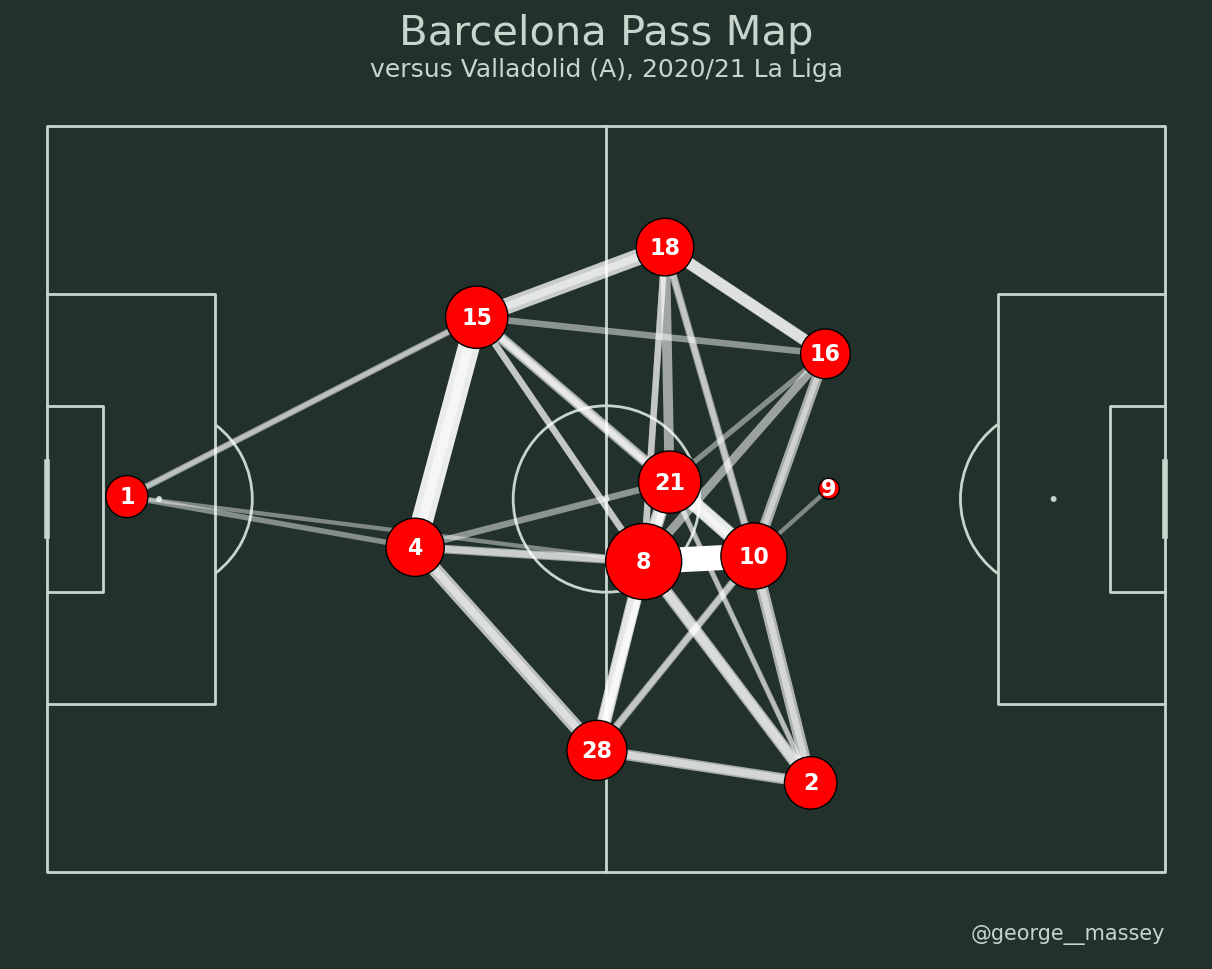

In [111]:
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")
axs['pitch'].invert_yaxis()
pass_lines = pitch.lines(1.2*pass_between.x, 0.8*pass_between.y,
                         1.2*pass_between.x_end, 0.8*pass_between.y_end, lw=pass_between.width,
                         color=color, zorder=1, ax=axs['pitch'])
pass_nodes = pitch.scatter(1.2*average_locations.x, 0.8*average_locations.y,
                           s=average_locations.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])
for index, row in average_locations.iterrows():
    pitch.annotate(row.name, xy=(1.2*row.x, 0.8*row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=axs['pitch'])

# Load a custom font.
#URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
#robotto_regular = FontManager(URL)

# endnote /title
axs['endnote'].text(1, 0.5, '@george__massey', color='#c7d5cc',
                    va='center', ha='right', fontsize=15,
                    #fontproperties=robotto_regular.prop
                    )
TITLE_TEXT = f'Barcelona Pass Map'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='#c7d5cc',
                  va='center', ha='center', fontsize=30) #fontproperties=robotto_regular.prop
                  
axs['title'].text(0.5, 0.25, 'versus Valladolid (A), 2020/21 La Liga', color='#c7d5cc',
                  va='center', ha='center', fontsize=18) #fontproperties=robotto_regular.prop
                 